In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
import sentinelhub
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

# made using example at https://sentinelhub-py.readthedocs.io/en/latest/examples/ogc_request.html

INSTANCE_ID = '3a4d845f-48a2-42dd-b596-5f1be96cb985' # instance id is in sentinelhub.config. update with sentinelhub.config --instance_id <ID> to set

def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [27]:
my_coords_wgs84 = [-72.4, -38, -72, -38.2]
my_bbox = BBox(bbox=my_coords_wgs84, crs=CRS.WGS84)

# get max amt of pixels at this bounding box at 10m ppx resolution
get_full_resolution = sentinelhub.geo_utils.bbox_to_dimensions(my_bbox, 10)

# set a resolution to preview images
preview_resolution= (int(get_full_resolution[0]/10), int(get_full_resolution[1]/10))

print(get_full_resolution)
print(preview_resolution) 

(3575, 2114)
(357, 211)
There are 80 Sentinel-2 images available for the given period.
These 80 images were taken on the following dates:
 - image 0 was taken on 2015-08-18 14:48:17
 - image 1 was taken on 2015-12-06 14:50:44
 - image 2 was taken on 2016-01-05 14:57:42
 - image 3 was taken on 2016-02-04 14:42:56
 - image 4 was taken on 2016-03-05 14:51:55
 - image 5 was taken on 2016-04-04 14:52:58
 - image 6 was taken on 2016-07-03 14:48:53
 - image 7 was taken on 2016-09-01 14:49:26
 - image 8 was taken on 2016-11-10 14:52:12
 - image 9 was taken on 2016-11-30 14:52:15
 - image 10 was taken on 2017-01-19 14:45:47
 - image 11 was taken on 2017-01-29 14:44:58
 - image 12 was taken on 2017-03-20 14:51:59
 - image 13 was taken on 2017-04-09 14:49:33
 - image 14 was taken on 2017-04-29 14:49:45
 - image 15 was taken on 2017-05-19 14:49:48
 - image 16 was taken on 2017-07-18 14:49:10
 - image 17 was taken on 2017-09-11 14:50:07
 - image 18 was taken on 2017-09-16 14:51:18
 - image 19 was t

In [57]:
# preview request
wms_true_color_request = WmsRequest(layer='TRUE-COLOR-S2-L1C',
                                    data_folder='testdir',
                                    bbox=my_bbox,
                                    time=('2019-01-01', '2019-12-31'),
                                    #resx='100m', resy='100m',
                                    maxcc=0.2, # cloud coverage
                                    instance_id=INSTANCE_ID,
                                    time_difference=datetime.timedelta(hours=2), #filter similar results
                                    width=preview_resolution[0], height=preview_resolution[1]
                                    )

wms_true_color_img = wms_true_color_request.get_data()
print('There are %d Sentinel-2 images available for the given period.' % len(wms_true_color_img))
print('These %d images were taken on the following dates:' % len(wms_true_color_img))
for index, date in enumerate(wms_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

There are 13 Sentinel-2 images available for the given period.
These 13 images were taken on the following dates:
 - image 0 was taken on 2019-01-04 14:53:19
 - image 1 was taken on 2019-01-14 14:53:21
 - image 2 was taken on 2019-01-19 14:53:18
 - image 3 was taken on 2019-01-24 14:53:21
 - image 4 was taken on 2019-01-29 14:54:09
 - image 5 was taken on 2019-02-03 14:53:22
 - image 6 was taken on 2019-02-13 14:53:21
 - image 7 was taken on 2019-02-18 14:53:18
 - image 8 was taken on 2019-02-23 14:59:07
 - image 9 was taken on 2019-02-28 14:53:41
 - image 10 was taken on 2019-03-05 15:07:27
 - image 11 was taken on 2019-03-10 14:54:43
 - image 12 was taken on 2019-03-15 14:54:42


In [58]:
# plot images
wms_true_color_img = wms_true_color_request.get_data()
plot_preview(wms_true_color_img)

#wms_true_color_img = wms_true_color_request.get_data(save_data=True)

AttributeError: 'list' object has no attribute 'previews'

In [30]:
def mask_invalid_images(self, max_invalid_coverage=0.1):
        """
        Marks images whose invalid area coverage exceeds ``max_invalid_coverage``. Those
        won't be used in timelapse.
        :param max_invalid_coverage: Limit on the invalid area coverage of images forming timelapse, 0 <= maxic <= 1.
        :type max_invalid_coverage: float
        """

        # low-res and hi-res images/cloud masks may differ, just to be safe
        coverage_fullres = np.asarray([1.0-self._get_coverage(mask) for mask in self.transparency_data])
        coverage_preview = np.asarray([1.0-self._get_coverage(mask) for mask in self.preview_transparency_data])

        self.invalid_coverage = np.array([max(x,y) for x,y in zip(coverage_fullres, coverage_preview)])
        
        for index in range(0, len(self.mask)):
            if self.invalid_coverage[index] > max_invalid_coverage:
                self.mask[index] = 1

In [31]:
wms_true_color_img.mask_invalid_images(max_invalid_coverage=0.01)

AttributeError: 'list' object has no attribute 'mask_invalid_images'

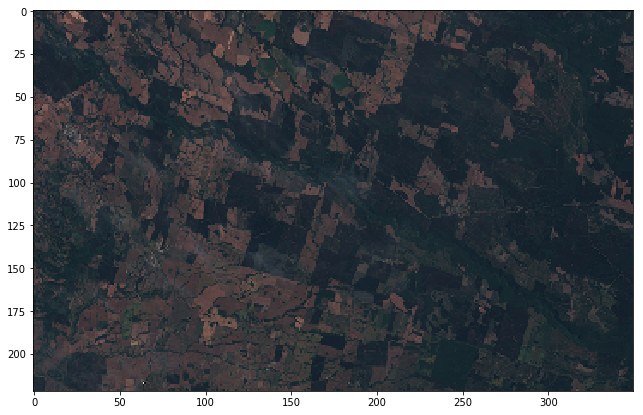

In [25]:
plot_image(wms_true_color_img[0])

In [19]:
plot_image(wms_true_color_img[1][:, :, 3])

IndexError: index 3 is out of bounds for axis 2 with size 3